In [1]:
from PyHeisenberg import HeisenbergGraph, DataAnalyzer, PulseSpinGraph
import numpy as np
import matplotlib.pyplot as plt
import warnings
from operator import itemgetter
warnings.filterwarnings('ignore')
plt.style.use('FigureStyle.mplstyle')

In [2]:
pGraph = PulseSpinGraph(
    spinInteractions={
        (0, 1): [0, 0, 0],
        (1, 2): [0, 0, 0],
        (1, 3): [1, 1, 1],
        (3, 5): [1, 1, 1],
        (4, 5): [0, 0, 0],
        (5, 6): [0, 0, 0],
    },
    externalField={
        0: [0.0, 0.0, 0.0],
        1: [0.0, 0.0, 0.0],
        2: [0.0, 0.0, 0.0],
        3: [0.0, 0.0, 0.0],
        4: [0.0, 0.0, 0.0],
        5: [0.0, 0.0, 0.0],
        6: [0.0, 0.0, 0.0],
    },
    localSimulation=False,
    backendName='ibmq_jakarta',
    noisySimulation=False,
    initializeList=[3,5]
)
pAnalyzer = DataAnalyzer(spinGraph=pGraph)

In [ ]:
demo = pGraph.rawEvolutionCircuit(STEPS=1, t=1.7)
demo.draw(output='mpl')

In [ ]:
from qiskit import transpile
transDemo = transpile(
    demo,
    basis_gates=['x', 'sx', 'rz', 'rzx'],
)
transDemo.draw(output='mpl')

In [ ]:
from qiskit import schedule
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import RZXCalibrationBuilderNoEcho
pm = PassManager([RZXCalibrationBuilderNoEcho(pGraph.backend)])
passDemo = pm.run(transDemo)
demoSchedule = schedule(passDemo, pGraph.backend)
demoSchedule.draw()

In [7]:
pauliStrings = ['IXIIIII', 'IIIXIII', 'IIIIIXI', 'IYIIIII',
                'IIIYIII', 'IIIIIYI', 'IZIIIII', 'IIIZIII', 'IIIIIZI']
timesEx, resultSeriesExact = pGraph.exactPauliExpValSeries(
    pauliStrings,
    t=1
)
ExX1, ExX2, ExX3, ExY1, ExY2, ExY3, ExZ1, ExZ2, ExZ3 = itemgetter(
    *pauliStrings)(resultSeriesExact)

In [8]:
measurementFitter = pGraph.getCalibrationFitter()

Job Status: job has successfully run


In [9]:
times, resultSeries = pGraph.pauliExpValSeries(
    pauliStrings,
    MAX_STEPS=8,
    t=1,
    measurementFitter=measurementFitter
)
X1, X2, X3, Y1, Y2, Y3, Z1, Z2, Z3 = itemgetter(*pauliStrings)(resultSeries)

Job Status: job has successfully run


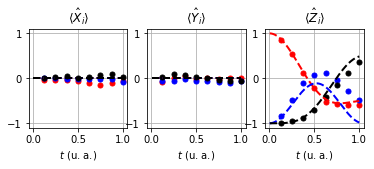

In [10]:
fig, (axX, axY, axZ) = plt.subplots(1, 3)
axX.plot(times, X1, 'ro', times, X2, 'bo', times, X3, 'ko')
axX.plot(timesEx, ExX1, color='red', linewidth=2, linestyle='dashed')
axX.plot(timesEx, ExX2, color='blue', linewidth=2, linestyle='dashed')
axX.plot(timesEx, ExX3, color='black', linewidth=2, linestyle='dashed')
axX.set_title(r"$\langle\hat{X}_i\rangle$")
axX.set_xlabel(r"$t$ (u. a.)")
axX.set_aspect(aspect=0.5)
axX.set_ylim([-1.1, 1.1])
axY.plot(times, Y1, 'ro', times, Y2, 'bo', times, Y3, 'ko')
axY.plot(timesEx, ExY1, color='red', linewidth=2, linestyle='dashed')
axY.plot(timesEx, ExY2, color='blue', linewidth=2, linestyle='dashed')
axY.plot(timesEx, ExY3, color='black', linewidth=2, linestyle='dashed')
axY.set_title(r"$\langle\hat{Y}_i\rangle$")
axY.set_xlabel(r"$t$ (u. a.)")
axY.set_aspect(aspect=0.5)
axY.set_ylim([-1.1, 1.1])
axZ.plot(times, Z1, 'ro', times, Z2, 'bo', times, Z3, 'ko')
axZ.plot(timesEx, ExZ1, color='red', linewidth=2, linestyle='dashed')
axZ.plot(timesEx, ExZ2, color='blue', linewidth=2, linestyle='dashed')
axZ.plot(timesEx, ExZ3, color='black', linewidth=2, linestyle='dashed')
axZ.set_title(r"$\langle\hat{Z}_i\rangle$")
axZ.set_xlabel(r"$t$ (u. a.)")
axZ.set_aspect(aspect=0.5)
axZ.set_ylim([-1.1, 1.1])
fig.savefig('XYZModel_DirectPulse.pdf')
plt.show()